In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [21]:
N=16
M=8
res_dir = os.path.join('res', f'{N}_{M}')

In [26]:
dp = pd.read_csv(os.path.join(res_dir, 'greedy_dp.csv'))
dp['type'] = 'dp'

In [27]:
bh = pd.read_csv(os.path.join(res_dir, 'basin_hopping.csv'))
bh['type'] = 'bh'

In [28]:
br = pd.read_csv(os.path.join(res_dir, 'brute.csv'))
br['type'] = 'br'

<AxesSubplot:xlabel='r', ylabel='dist_prop'>

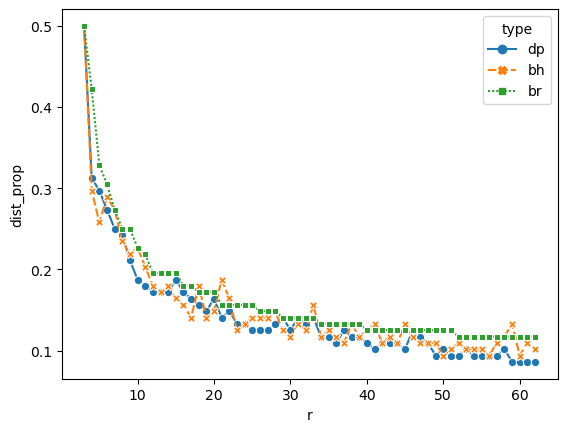

In [30]:
sns.lineplot(data=pd.concat([dp, bh, br]), x='r', y='dist_prop', hue='type', style='type', markers=True)

Text(0, 0.5, 'dp/bh')

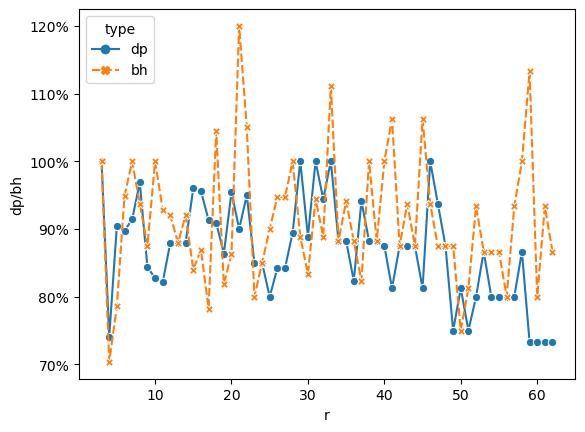

In [47]:
import matplotlib.ticker as mtick

prop = pd.concat([dp, bh]).reset_index(drop=True)
prop['prop'] = prop['dist'] / pd.concat([br['dist']] * 2).reset_index(drop=True)

fig, ax = plt.subplots(1, 1)
sns.lineplot(data=prop, x='r', y='prop', hue='type', style='type', markers=True, ax=ax)


# ax.plot(dp['r'], dp['dist'] / bh['dist'], '--')
# ax.scatter(dp['r'], dp['dist'] / bh['dist'])

# m = np.mean(dp['dist'] / bh['dist'])


# ax.plot(dp['r'], [1.0] * len(dp['r']), '--', color='orange')
# ax.plot(dp['r'], [m] * len(dp['r']), color='red')

xticks = mtick.PercentFormatter(1.0)
ax.yaxis.set_major_formatter(xticks)
ax.set_xlabel('r')
ax.set_ylabel('dp/bh')
